# COVID-19 Positive Patients Data Analysis - India

# Source of Data
# https://www.covid19india.org/
    


# About the Data:


# Data is collected based on the details from each State Press release, official government links and reputable news channel as source. Data is validated by group of volunteers and pushed into the website.

In [2]:
#importing neccesary packages
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing Data
COVID19_patients = pd.read_csv("C:\\Users\\User\\Downloads\\Covid_Patient_Data.csv",encoding= 'unicode_escape')

In [4]:
#taking 680 Data points
COVID19_patients = COVID19_patients[0:680]

In [5]:
COVID19_patients.head(100).style.set_properties(**{'background-color': 'green',                                                   
                                    'color': 'white',                       
                                    'border-color': 'white'})

# Analysis Part 1 -  Patient Notes 

In [6]:
#Basic Data cleaning
COVID19_patients.shape

(680, 17)

In [7]:
index = pd.notnull(COVID19_patients["Notes"])

Patients_with_Notes = COVID19_patients[index]

In [8]:
pd.DataFrame(Patients_with_Notes["Notes"].value_counts()).head(10)

,Notes
Details Awaited,113
Travelled from Dubai,29
"Travelled from Dubai, UAE",25
Travelled from UK,23
Travelled from Italy,18
Travelled from Saudi Arabia,10
Travelled from London,9
Indonesian,7
Travelled from Middle East,7
Family members of P4,6


In [9]:
Patients_with_Notes = Patients_with_Notes[Patients_with_Notes["Notes"] != 'Details Awaited']
Patients_with_Notes.shape

(562, 17)

# Separate Patients "with" and "without" travel history

In [10]:
#Create an identifier with travel history

Patients_with_Notes['Has_Travel_History'] = Patients_with_Notes.apply(lambda row: 'Travel History - Yes' if row.Notes.find('Travel') >= 0 else 'Travel History - No', axis = 1)

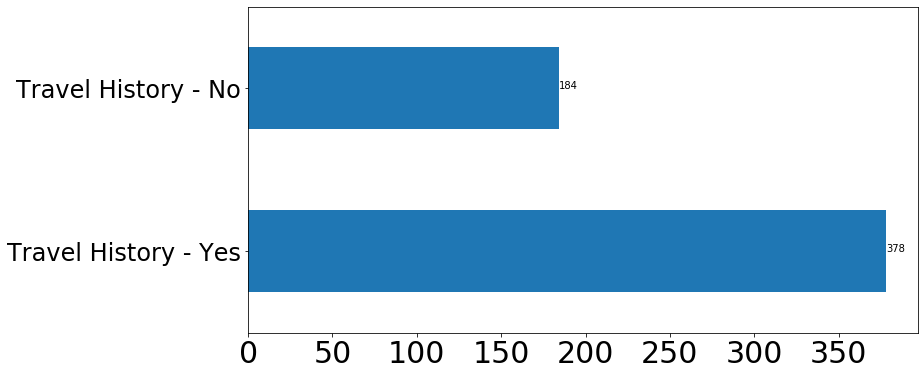

In [11]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 6))
ax = Patients_with_Notes["Has_Travel_History"].value_counts().plot(kind='Barh')
plt.xticks(
    rotation=0, 
    fontsize=30  
)
plt.yticks(fontsize=24)
[ax.text(v, i, '{:}'.format(v)) for i, v in enumerate(Patients_with_Notes["Has_Travel_History"].value_counts())];

In [12]:
#Separate Patients without travel history
patients_without_travel_history = Patients_with_Notes[Patients_with_Notes["Has_Travel_History"]==0]

In [13]:
#Writing the data to csv
patients_without_travel_history.to_csv("No_travel_patients.csv")

In [14]:
#Creating buckets -- What apart from travel??
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Family' if row.Notes.find('Daughter') >= 0 else 'Unknown', axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Family' if row.Notes.find('daughter') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Family' if row.Notes.find('Son') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Family' if row.Notes.find('son') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Family' if row.Notes.find('father') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Family' if row.Notes.find('Family') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Family' if row.Notes.find('family') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Family' if row.Notes.find('Father') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Family' if row.Notes.find('Mother') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Family' if row.Notes.find('mother') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Family' if row.Notes.find('Wife') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Family' if row.Notes.find('wife') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Family' if row.Notes.find('Spouse') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Family' if row.Notes.find('spouse') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Family' if row.Notes.find('Aunt') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Family' if row.Notes.find('aunt') >= 0 else row.connection_with_patient, axis = 1)

patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Relative/Neighbour' if row.Notes.find('Relative') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Relative/Neighbour' if row.Notes.find('relative') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Relative/Neighbour' if row.Notes.find('Neighbour') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Relative/Neighbour' if row.Notes.find('Neighbour') >= 0 else row.connection_with_patient, axis = 1)

patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Medical staff' if row.Notes.find('Doctor') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Medical staff' if row.Notes.find('doctor') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Medical staff' if row.Notes.find('Compounder') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Medical staff' if row.Notes.find('compounder') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Medical staff' if row.Notes.find('Nurse') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Medical staff' if row.Notes.find('nurse') >= 0 else row.connection_with_patient, axis = 1)

patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Service Provider To patient' if row.Notes.find('Cook') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Service Provider To patient' if row.Notes.find('cook') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Service Provider To patient' if row.Notes.find('Cab') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Service Provider To patient' if row.Notes.find('cab') >= 0 else row.connection_with_patient, axis = 1)

patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Tourist' if row.Notes.find('Tourist') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Tourist' if row.Notes.find('tourist') >= 0 else row.connection_with_patient, axis = 1)

patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Family' if row.Notes.find('Brother') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Family' if row.Notes.find('brother') >= 0 else row.connection_with_patient, axis = 1)


patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Family' if row.Notes.find('Husband') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Family' if row.Notes.find('husband') >= 0 else row.connection_with_patient, axis = 1)

patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Indonesian' if row.Notes.find('Indonesia') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Indonesian' if row.Notes.find('indonesia') >= 0 else row.connection_with_patient, axis = 1)

patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Medical staff' if row.Notes.find('Staff') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Medical staff' if row.Notes.find('staff') >= 0 else row.connection_with_patient, axis = 1)

patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Close Contact' if row.Notes.find('Friend') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Close Contact' if row.Notes.find('friend') >= 0 else row.connection_with_patient, axis = 1)

patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Close Contact' if row.Notes.find('contact') >= 0 else row.connection_with_patient, axis = 1)
patients_without_travel_history['connection_with_patient'] = patients_without_travel_history.apply(lambda row: 'Close Contact' if row.Notes.find('Contact') >= 0 else row.connection_with_patient, axis = 1)


ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

In [15]:
plt.figure(figsize=(12, 6))
ax = patients_without_travel_history['connection_with_patient'].value_counts().plot(kind='Barh')
plt.xticks(
    rotation=0, 
    fontsize=30  
)
plt.yticks(fontsize=24)
[ax.text(v, i, '{:}'.format(v)) for i, v in enumerate(patients_without_travel_history['connection_with_patient'].value_counts())];

KeyError: 'connection_with_patient'

<Figure size 864x432 with 0 Axes>

# Conclusion Part 1 - Let us Understand Importance of Social distancing

# Analysis Part 2 -  Patient Age 

In [301]:
index = pd.notnull(COVID19_patients["Age Bracket"])

Patients_with_valid_Age = COVID19_patients[index]

In [302]:
Patients_with_valid_Age.shape

(347, 17)

In [303]:
bins = [0, 20, 30, 40, 50,60,70,80, 90, 100]
Patients_with_valid_Age['Age_bucket'] = pd.cut(Patients_with_valid_Age["Age Bracket"], bins)

In [304]:
Patients_with_valid_Age_20_30 = Patients_with_valid_Age[
    (Patients_with_valid_Age['Age Bracket']>=20) & (Patients_with_valid_Age['Age Bracket']<30)]

In [ ]:
patients_without_travel_history['connection_with_patient']

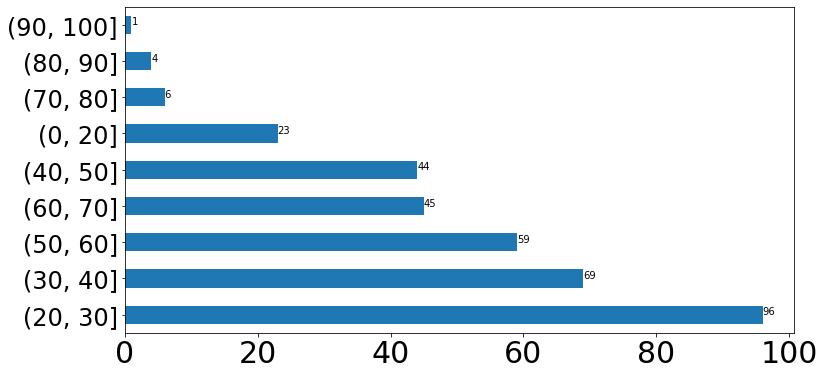

In [349]:
plt.figure(figsize=(12, 6))
ax = Patients_with_valid_Age['Age_bucket'].value_counts().plot(kind='Barh')
plt.xticks(
    rotation=0, 
    fontsize=30  
)
plt.yticks(fontsize=24)
[ax.text(v, i, '{:}'.format(v)) for i, v in enumerate(Patients_with_valid_Age['Age_bucket'].value_counts())];

In [307]:
pd.DataFrame(Patients_with_valid_Age_20_30["Notes"].value_counts()).head(10)

,Notes
Travelled from UK,13
"Travelled from Dubai, UAE",5
Travelled from London,4
"Travelled from France via Delhi, Kochi",2
Daughter of P171,2
Travelled from Paris,2
"No Travel History, Contact with Indonesian Group",1
Travelled from Dubai via Air Arabia G9 425,1
Travelled from UK via Mumbai,1
"Employee of P172, Accompanied P224 & Driver",1


In [308]:
Patients_with_valid_Age_70_80 = Patients_with_valid_Age[
    (Patients_with_valid_Age['Age Bracket']>50) & (Patients_with_valid_Age['Age Bracket']<60)]

In [309]:
Patients_with_valid_Age_80_90 = Patients_with_valid_Age[
    (Patients_with_valid_Age['Age Bracket']>80) & (Patients_with_valid_Age['Age Bracket']<90)]

In [310]:
Patients_with_valid_Age_0_20 = Patients_with_valid_Age[
    (Patients_with_valid_Age['Age Bracket']>=0) & (Patients_with_valid_Age['Age Bracket']<20)]

# Conclusion Part 2 - Myth Busted about Age!!
# Lets take utmost care, no matter what age group we are in


# Analysis Part 3 -  The Spread Analysis - Two sample patients

In [311]:
COVID19_patients_infectedby_P182 = COVID19_patients[COVID19_patients["Contracted from which Patient (Suspected)"] == 'P182']

In [1]:
#COVID19_patients_infectedby_P182
COVID19_patients_infectedby_P182[["Patient number","Age Bracket","Gender","Notes",
                                  "Date Announced","Contracted from which Patient (Suspected)"]].head(100).style.set_properties(**{'background-color': 'green',                                                   
                                    'color': 'white',                       
                                    'border-color': 'white'})

NameError: name 'COVID19_patients_infectedby_P182' is not defined

In [284]:
COVID19_patients_infectedby_P6 = COVID19_patients[COVID19_patients["Contracted from which Patient (Suspected)"] == 'P6']

In [285]:
#COVID19_patients_infectedby_P182
COVID19_patients_infectedby_P6[["Patient number","Age Bracket","Gender","Notes",
                                  "Date Announced","Contracted from which Patient (Suspected)"]].head(100).style.set_properties(**{'background-color': 'pink',                                                   
                                    'color': 'black',                       
                                    'border-color': 'white'})

,Patient number,Age Bracket,Gender,Notes,Date Announced,Contracted from which Patient (Suspected)
6,7,55,nan,Travelled from Italy,4/3/2020,P6
7,8,55,nan,Travelled from Italy,4/3/2020,P6
8,9,55,nan,Travelled from Italy,4/3/2020,P6
9,10,55,nan,Travelled from Italy,4/3/2020,P6
10,11,55,nan,Travelled from Italy,4/3/2020,P6
11,12,55,nan,Travelled from Italy,4/3/2020,P6
12,13,55,nan,Travelled from Italy,4/3/2020,P6
13,14,55,nan,Travelled from Italy,4/3/2020,P6
14,15,55,nan,Travelled from Italy,4/3/2020,P6
15,16,55,nan,Travelled from Italy,4/3/2020,P6


# Conclusion Part 3 - Importance of isolation
# Please please understand importance of isolation and do not create new clusters
